In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
merge = pd.read_csv('merge.csv')
quick = pd.read_csv('quick.csv')

In [4]:
summary_quick = quick.groupby('input_size').agg([np.min, np.max, np.mean, np.var, np.std])
summary_merge = merge.groupby('input_size').agg([np.min, np.max, np.mean, np.var, np.std])

## Teoretyczna wartość oczekiwana

Wyliczmy teoretyczną wartość oczkiwaną dla algorytmu Quick Sort

In [5]:
th_expected_quick = summary_quick.index * np.log(summary_quick.index)

Wyliczmy teraz stosunek wartości oczekiwanej uzyskanej eksperymentalnie do wartości teoretycznej:

In [6]:
comp_quick = pd.DataFrame({
    "input_size": summary_quick.index,
    "EX": summary_quick['comparisons_num']['mean'],
    "Th EX": th_expected_quick
})

comp_quick["EX / Th EX"] = comp_quick["EX"] / comp_quick["Th EX"]
comp_quick

,input_size,EX,Th EX,EX / Th EX
input_size,,,,
100,100,776.036,460.517019,1.685141
200,200,1803.695,1059.663473,1.702139
300,300,2935.385,1711.134742,1.715461
400,400,4120.066,2396.585819,1.719140
500,500,5333.013,3107.304049,1.716283
...,...,...,...,...
9600,9600,147028.128,88027.376424,1.670255
9700,9700,148585.220,89044.847296,1.668656
9800,9800,150683.320,90063.349114,1.673081


Stąd możemy wyliczyć wartość stałej $k$.

In [7]:
k_quick = np.mean(comp_quick["EX / Th EX"])
k_quick

1.6868433018313718

Otrzymaliśmy zatem wartość $k \approx 1.68$.

Przeprowadźmy analogiczne obliczenia dla algorytmu Merge Sort

In [8]:
th_expected_merge = summary_merge.index * np.log(summary_merge.index)
comp_merge = pd.DataFrame({
    "input_size": summary_merge.index,
    "EX": summary_merge['comparisons_num']['mean'],
    "Th EX": th_expected_merge
})

comp_merge["EX / Th EX"] = comp_merge["EX"] / comp_merge["Th EX"]
comp_merge

,input_size,EX,Th EX,EX / Th EX
input_size,,,,
100,100,541.849,460.517019,1.176610
200,200,1282.109,1059.663473,1.209921
300,300,2097.323,1711.134742,1.225691
400,400,2961.961,2396.585819,1.235909
500,500,3854.368,3107.304049,1.240422
...,...,...,...,...
9600,9600,114985.625,88027.376424,1.306248
9700,9700,116332.220,89044.847296,1.306445
9800,9800,117676.559,90063.349114,1.306598


In [9]:
k_merge = np.mean(comp_merge["EX / Th EX"])
k_merge

1.2884008811939887

Otrzymujemy $k \approx 1.29$

## Nierówność Czebyszewa

Nierówność Czebyszewa określona jest za pomocą następującego wzoru:
$P(|X - E(X)| \geq t) \leq \frac{Var(X)}{t^2}$

Przyjmijmy $\frac{Var(X)}{t^2} = 0.05$

Stąd otrzymujemy, że $t = \sqrt{\frac{Var(X)}{0.05}}$

Wyliczmy teraz wartość $t$ dla algorytmu Quick Sort:

In [10]:
t = np.sqrt(summary_quick['comparisons_num']['var'] / 0.05)

Dalej z nierówności wiemy, że $|X - E(X)| \leq t$. Możemy zatem stąd wyliczyć górne oraz dolne ograniczenie:

$X_u = E(X) + t$

$X_l = E(X) - t$

In [11]:
x_u = summary_quick['comparisons_num']['mean'] + t
x_l = summary_quick['comparisons_num']['mean'] - t

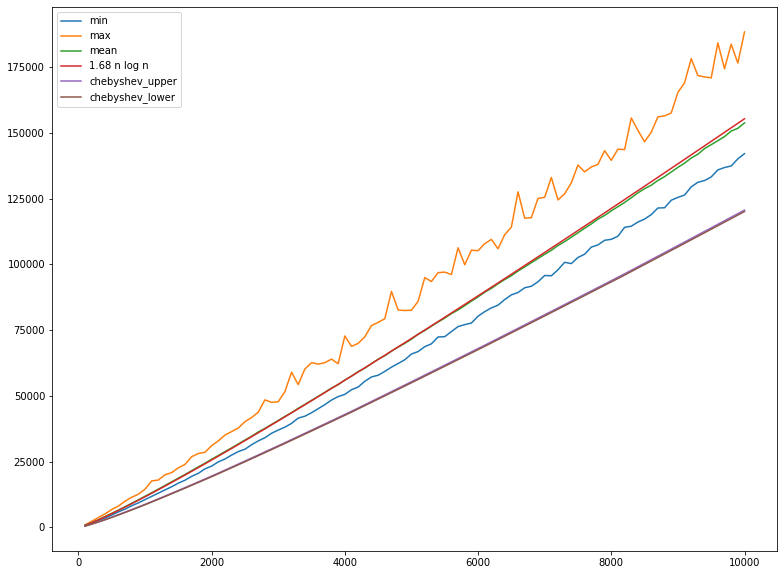

In [21]:
x = np.linspace(100, 10000, 100)
fig, ax = plt.subplots(figsize=(13, 10)) 
ax.plot(x, summary_quick['comparisons_num']['amin'], label="min")
ax.plot(x, summary_quick['comparisons_num']['amax'], label="max")
ax.plot(x, summary_quick['comparisons_num']['mean'], label="mean")
ax.plot(x, k_quick * comp_quick["Th EX"], label="1.68 n log n")
ax.plot(x, x_u, label="chebyshev_upper")
ax.plot(x, x_l, label="chebyshev_lower")
ax.legend()

Analogicznie robimy dla algorytmu Merge Sort

In [13]:
t = np.sqrt(summary_merge['comparisons_num']['var'] / 0.05)

In [14]:
x_u = summary_merge['comparisons_num']['mean'] + t
x_l = summary_merge['comparisons_num']['mean'] - t

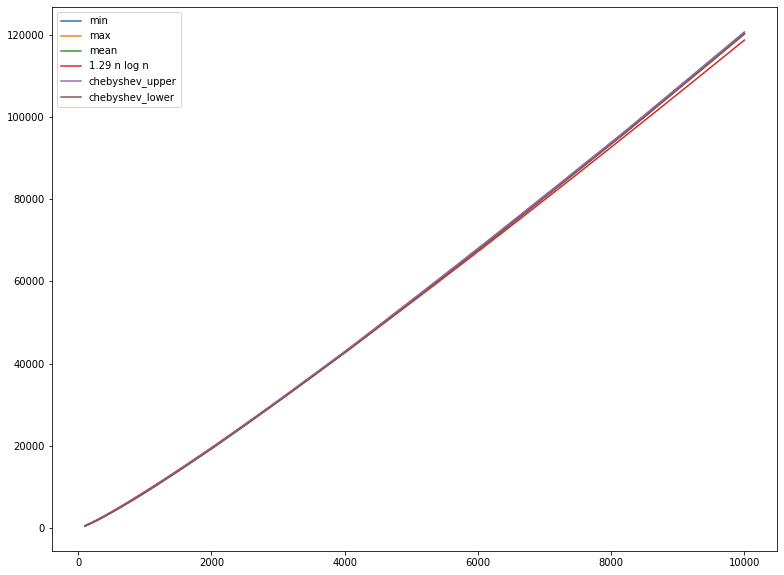

In [17]:
x = np.linspace(100, 10000, 100)
fig, ax = plt.subplots(figsize=(13, 10)) 
ax.plot(x, summary_merge['comparisons_num']['amin'], label="min")
ax.plot(x, summary_merge['comparisons_num']['amax'], label="max")
ax.plot(x, summary_merge['comparisons_num']['mean'], label="mean")
ax.plot(x, k_merge * comp_merge["Th EX"], label="1.29 n log n")
ax.plot(x, x_u, label="chebyshev_upper")
ax.plot(x, x_l, label="chebyshev_lower")
ax.legend()